# Commot for VISTA2

In [2]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [13]:
#Reading the results from the commot analysis (done in commot_VISTA_L1_1_L1_2_L4_1) -> 

In [56]:
path_L1_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/L1_1_dis500_commot.h5ad"
path_L1_2_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/L1_2_dis500_commot.h5ad"
path_L4_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/L4_1_dis500_commot.h5ad"

L1_1_dis500_commot = sc.read_h5ad(path_L1_1_dis500_commot)
L1_2_dis500_commot = sc.read_h5ad(path_L1_2_dis500_commot)
L4_1_dis500_commot = sc.read_h5ad(path_L4_1_dis500_commot)


#### OUT checking run time for commot

In [9]:
import os
import time

# Path to the file/directory
path = path_adata_chuv_dis500

# Both the variables would contain time
# elapsed since EPOCH in float
ti_c = os.path.getctime(path)
ti_m = os.path.getmtime(path)

# Converting the time in seconds to a timestamp
c_ti = time.ctime(ti_c)
m_ti = time.ctime(ti_m)

print(f"The file located at the path {path} \
was created at {c_ti} and was "
      f"last modified at {m_ti}")

The file located at the path /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/adata_chuv_dis500.h5ad was created at Thu Apr 25 11:43:14 2024 and was last modified at Thu Apr 25 11:43:14 2024


#### Analysing commot results 

In [58]:
adata_dis500_commot

AnnData object with n_obs × n_vars = 72666 × 271
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident'
    uns: 'X_name', 'commot-cellchat-info'
    obsm: 'PCA', 'TSNE', 'UMAP', 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial'
    layers: 'logcounts'
    obsp: 'commot-cellchat-AREG-EGFR', 'commot-cellchat-CXCL', 'commot-cellchat-CXCL10-ACKR1', 'commot-cellchat-CXCL13-ACKR1', 'commot-cellchat-CXCL13-CXCR5', 'commot-cellchat-CXCL5-ACKR1', 'commot-cellchat-CXCL6-ACKR1', 'commot-cellchat-CXCL9-ACKR1', 'comm

In [20]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='CXCL', k=5)

In [21]:
adata_dis500

AnnData object with n_obs × n_vars = 72666 × 271
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident'
    uns: 'X_name', 'commot-cellchat-info'
    obsm: 'PCA', 'TSNE', 'UMAP', 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial', 'commot_sender_vf-cellchat-CXCL', 'commot_receiver_vf-cellchat-CXCL'
    layers: 'logcounts'
    obsp: 'commot-cellchat-AREG-EGFR', 'commot-cellchat-CXCL', 'commot-cellchat-CXCL10-ACKR1', 'commot-cellchat-CXCL13-ACKR1', 'commot-cellchat-CXCL13-CXCR5', 'commot-cellchat-CXCL5-ACKR1

<Axes: >

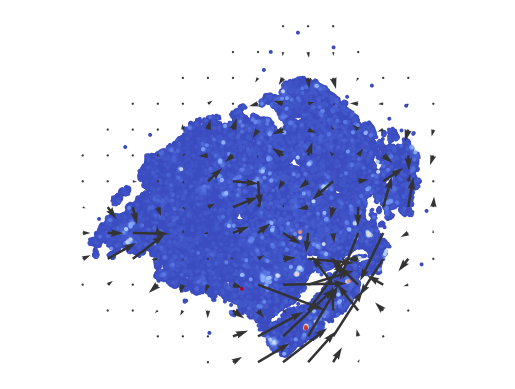

In [35]:
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='CXCL', plot_method='grid', background_legend=False,
    scale=0.00009, ndsize=8, grid_density=0.3, normalize_v = True, normalize_v_quantile=0.995)

In [ ]:
chuvio_L1_1.obs['leiden'] = adata.obs['leiden']